### Bitcoin historic data (extraction)
**Working on it...**

Good [website](http://www.cryptodatadownload.com/) to start with.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Package installation for financial visulizations
# !pip install --upgrade mplfinance
import mplfinance as mpf

plt.style.use('seaborn')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
btc_path = 'C:/Users/Javi/Desktop/cryptocurrency_predictor/data/crypto/Bitstamp_BTCUSD_minute.csv'
columns_to_use = ['unix', 'symbol', 'open', 'high', 'low', 'close', 'Volume USD']

btc = pd.read_csv(btc_path, header=1, usecols=columns_to_use)

In [3]:
df_btc = btc.copy()
df_btc.head()

unix   symbol      open      high       low     close     Volume USD
0  1613456340  BTC/USD  49007.20  49007.20  48919.00  48922.80  208600.888778
1  1613456280  BTC/USD  49008.71  49011.37  48976.00  49006.90   70389.887590
2  1613456220  BTC/USD  48999.32  49083.22  48993.11  49083.22    6125.500451
3  1613456160  BTC/USD  49092.51  49092.51  49000.95  49011.08  170701.263472
4  1613456100  BTC/USD  49106.56  49118.73  49100.00  49102.16  104058.328617

In [4]:
# "date" column is in UTC time
# We need to get our local time from "unix" column
# Let's make a column with a proper date

from datetime import datetime

In [5]:
%%time

df_btc['unix'].apply(lambda x: datetime.fromtimestamp(x))
print()


Wall time: 137 ms


In [6]:
%%time

[datetime.fromtimestamp(ts) for ts in df_btc['unix']]
print()


Wall time: 103 ms


In [7]:
# So the "apply()" method is slightly slower than "list comprehension" in this example. Interesting
df_btc['date'] = [datetime.fromtimestamp(ts) for ts in df_btc['unix']]

In [8]:
# Sort dates
df_btc.sort_values(by='date', ascending=True, ignore_index=True, inplace=True)
# Set date as index
df_btc.index = df_btc['date']
# We can drop some columns now
df_btc.drop(['unix', 'symbol', 'date'], axis=1, inplace=True)
# Rename volume column
df_btc.rename(columns={'Volume USD': 'volume'}, inplace=True)

In [9]:
df_btc.head()

open      high       low     close        volume
date                                                                     
2020-11-22 08:57:00  18494.17  18511.57  18485.07  18511.57  27241.827263
2020-11-22 08:58:00  18504.96  18517.30  18504.57  18517.30  28432.253479
2020-11-22 08:59:00  18521.33  18527.41  18511.13  18520.98  76742.234037
2020-11-22 09:00:00  18511.86  18519.25  18494.31  18494.31  57143.974629
2020-11-22 09:01:00  18493.49  18512.82  18493.49  18512.82  22223.664414

Now, we have a lot of data here, thank God (which doesn't exist), that it will be helpful in the future. But now we just want to build a preliminary project with toy data, so let's just take a sample to play with filtering by date. **Same dates as twitter extraction sample we got earlier.** <br> Let's do it baby!

In [10]:
df_btc.index.min(), df_btc.index.max()

(Timestamp('2020-11-22 08:57:00'), Timestamp('2021-02-16 07:19:00'))

In [11]:
max_volume = (df_btc['volume'] == df_btc['volume'].max())
# Date with the greatest volume of bitcoins traded
df_btc[max_volume]

open     high       low     close        volume
date                                                                   
2021-01-10 21:28:00  35205.7  35300.0  34322.07  35045.45  1.396792e+07

In [12]:
# Preparing the df to plot it 

intraday = df_btc[(df_btc.index > '2021-01-10 10:00:00') & (df_btc.index < '2021-01-11 10:00:00')]
# intraday.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
# intraday.set_index('Date', inplace=True)
print(intraday.shape)
intraday.head(3)

(1439, 5)


open      high       low     close         volume
date                                                                      
2021-01-10 10:01:00  40900.89  40990.00  40900.89  40990.00  108938.474948
2021-01-10 10:02:00  40973.09  40980.96  40953.40  40976.80  115543.638473
2021-01-10 10:03:00  40962.33  41000.00  40962.33  40978.88  110602.303232

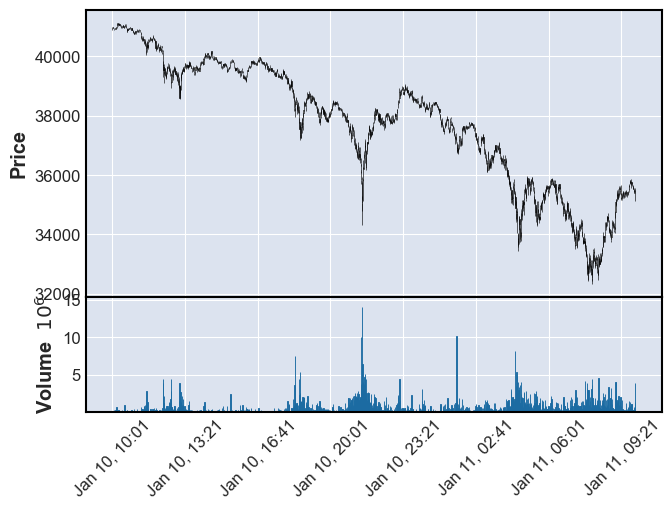

In [13]:
mpf.plot(intraday, type='candle', volume=True)

In [14]:
# # Volume of bitcoins traded in US dollars
# plt.figure(figsize=(10, 6))
# plt.plot(df_btc['date'], df_btc['volume_usd'])

# plt.title('Volume of bitcoins traded in USD')
# plt.xlabel('date (month-day hour)')
# plt.ylabel('million USD')

### Twitter groupbies and sum by time frames

In [15]:
tweets_path = 'C:/Users/Javi/Desktop/cryptocurrency_predictor/data/twitter/scored_tweets.csv'

tweets = pd.read_csv(tweets_path)
df_tweets = tweets.copy()

In [16]:
df_tweets.rename(columns={'created_at': 'date'}, inplace=True)
df_tweets['date'] = pd.to_datetime(df_tweets['date'])
df_tweets.set_index('date', inplace=True)
print(df_tweets.info())
df_tweets.head(3)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25922 entries, 2021-02-08 19:05:35 to 2021-02-09 01:44:54
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 25922 non-null  int64  
 1   text               25922 non-null  object 
 2   followers          25922 non-null  int64  
 3   likes              25922 non-null  int64  
 4   vader_polarity     25922 non-null  float64
 5   textblob_polarity  25922 non-null  float64
 6   emotion            25922 non-null  object 
 7   vader_score        25922 non-null  float64
 8   textblob_score     25922 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 2.0+ MB
None


id  \
date                                       
2021-02-08 19:05:35  1358854507405467651   
2021-02-08 19:05:36  1358854509888438273   
2021-02-08 19:05:36  1358854510345650182   

                                                                  text  \
date                                                                     
2021-02-08 19:05:35  RT : LATOKEN Bitcoin Giveaway 💰 5 lucky winner...   
2021-02-08 19:05:36  Btc drops 2% &amp; he's tweeetin up a storm. C...   
2021-02-08 19:05:36  RT : on the 02/08/2021 at 07:02 1BTC was worth...   

                     followers  likes  vader_polarity  textblob_polarity  \
date                                                                       
2021-02-08 19:05:35         29      0          0.8579           0.383333   
2021-02-08 19:05:36        930      0          0.0276           0.450000   
2021-02-08 19:05:36        196      0          0.2263           0.300000   

                      emotion  vader_score  textblob_score  
date                                                        
2021-02-08 19:05:35  Positive     0.257370          0.1150  
2021-02-08 19:05:36  Positive     0.256956          4.1895  
2021-02-08 19:05:36  Positive     0.445811          0.5910

In [17]:
min_vader_scores = df_tweets.groupby(pd.Grouper(freq='min'))['vader_polarity', 'vader_score'].sum()

min_textblob_scores = df_tweets.groupby(pd.Grouper(freq='min'))['textblob_polarity', 'textblob_score'].sum()

print(min_vader_scores.head(3))
print('*' * 50)
print(min_textblob_scores.head(3))

                     vader_polarity  vader_score
date                                            
2021-02-08 19:05:00         28.9641  2016.656198
2021-02-08 19:06:00         72.4431  3996.306653
2021-02-08 19:07:00         65.8778   888.091110
**************************************************
                     textblob_polarity  textblob_score
date                                                  
2021-02-08 19:05:00          19.080325      421.643027
2021-02-08 19:06:00          36.554706     1443.363620
2021-02-08 19:07:00          34.636677      404.474439


C:\Users\Javi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\Users\Javi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
# minutely_scores[(minutely_scores.index >= '2021-02-09 01:00:00') & (minutely_scores.index <= '2021-02-09 01:10:00')]

In [19]:
# least_score = df_tweets[(df_tweets.index >= '2021-02-09 01:03:00') & (df_tweets.index <= '2021-02-09 01:05:00')]
# least_score[least_score['score'] == least_score['score'].min()]

### VADER Analysis

Text(0, 0.5, 'Total Score')

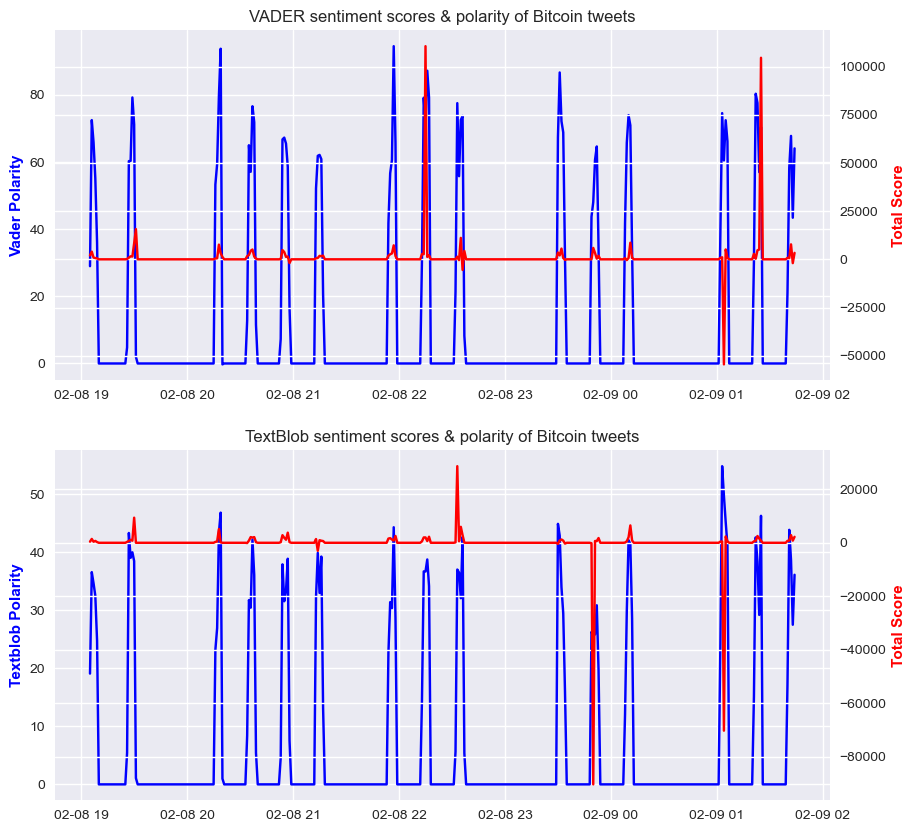

In [20]:
plt.style.use('seaborn')

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
# VADER plot
axes[0].set_title('VADER sentiment scores & polarity of Bitcoin tweets')
ax1 = axes[0].twinx()
axes[0].plot(min_vader_scores.index, min_vader_scores['vader_polarity'], 'b')
ax1.plot(min_vader_scores.index, min_vader_scores['vader_score'], 'r')
axes[0].set_ylabel('Vader Polarity', color='b')
ax1.set_ylabel('Total Score', color='r')
# TextBlob plot
axes[1].set_title('TextBlob sentiment scores & polarity of Bitcoin tweets')
ax2 = axes[1].twinx()
axes[1].plot(min_vader_scores.index, min_textblob_scores['textblob_polarity'], 'b')
ax2.plot(min_vader_scores.index, min_textblob_scores['textblob_score'], 'r')
axes[1].set_ylabel('Textblob Polarity', color='b')
ax2.set_ylabel('Total Score', color='r')

In [21]:
# Reduce bitcoin df length to match 
df_btc = df_btc[(df_btc.index >= df_tweets.index.min()) & (df_btc.index <= df_tweets.index.max())]
df_btc.head()

open      high       low     close         volume
date                                                                      
2021-02-08 19:06:00  42895.76  42965.08  42895.76  42915.27  342674.456996
2021-02-08 19:07:00  42941.18  42977.13  42914.58  42965.50   46553.344389
2021-02-08 19:08:00  42957.43  43017.04  42922.74  42982.08  132488.774894
2021-02-08 19:09:00  42983.08  42988.38  42925.96  42934.67  100497.784013
2021-02-08 19:10:00  42943.19  42966.87  42913.66  42937.88  148091.642899

In [22]:
data = pd.merge(df_btc, min_vader_scores, right_index=True, left_index=True)
data.head()

open      high       low     close         volume  \
date                                                                         
2021-02-08 19:06:00  42895.76  42965.08  42895.76  42915.27  342674.456996   
2021-02-08 19:07:00  42941.18  42977.13  42914.58  42965.50   46553.344389   
2021-02-08 19:08:00  42957.43  43017.04  42922.74  42982.08  132488.774894   
2021-02-08 19:09:00  42983.08  42988.38  42925.96  42934.67  100497.784013   
2021-02-08 19:10:00  42943.19  42966.87  42913.66  42937.88  148091.642899   

                     vader_polarity  vader_score  
date                                              
2021-02-08 19:06:00         72.4431  3996.306653  
2021-02-08 19:07:00         65.8778   888.091110  
2021-02-08 19:08:00         55.1792   686.238551  
2021-02-08 19:09:00         36.0288   467.526109  
2021-02-08 19:10:00          0.0000     0.000000

In [23]:
data['vader_score'].min(), data['vader_score'].max()

(-54501.10092799999, 110585.90395199995)

Text(0, 0.5, 'VADER Sentiment Score')

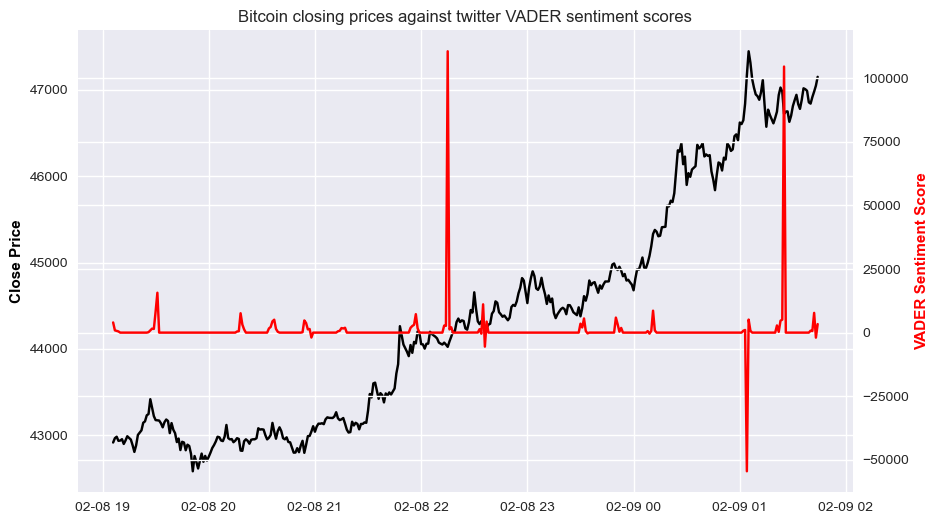

In [24]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_title('Bitcoin closing prices against twitter VADER sentiment scores')
ax2 = ax1.twinx()

ax1.plot(data.index, data['close'], 'k')
ax2.plot(data.index, data['vader_score'], 'r')

ax1.set_ylabel('Close Price', color='k')
ax2.set_ylabel('VADER Sentiment Score', color='r')

**TextBlob Scores**

Text(0, 0.5, 'TextBlob Sentiment score')

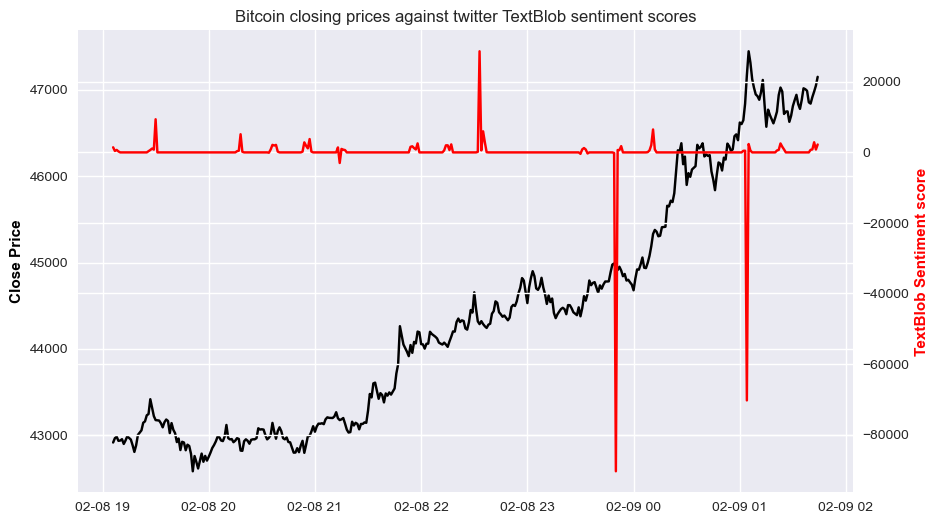

In [25]:
# Creating a df for textblob
data_tb = pd.merge(df_btc, min_textblob_scores, right_index=True, left_index=True)
# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_title('Bitcoin closing prices against twitter TextBlob sentiment scores')
ax2 = ax1.twinx()

ax1.plot(data.index, data['close'], 'k')
ax2.plot(data.index, data_tb['textblob_score'], 'r')

ax1.set_ylabel('Close Price', color='k')
ax2.set_ylabel('TextBlob Sentiment score', color='r')

VADER sentiment scores seem to be more correlated to Bitcoin prices than TextBlob scores, as we thought even before plotting.